** kNN의 일반적인 접근 방법

1. 수집: 모든 방법
2. 준비: 수치형 값(거리를 계산하기 위해 필요), 구조적으로 표현된 데이터 형식이 가장 좋다.
3. 분석: 모든 방법
4. 훈련: kNN 알고리즘은 적용되지 않음.
5. 검사: 오류율(error rate)을 계산함
6. 사용: 응용 프로그램은 입력 데이터를 받아 구조가 있는 수치형 값으로 출력하는데 필요하다.
       그런 다음, 응용프로그램은 입력 데이터를 가지고 kNN 알고리즘을 실행해서 입력 데이터가 속하는 분류 항목을 결정한다.
       응용 프로그램은 이때 계산된 분류 항목에서 몇 가지 조치를 취한다.

In [1]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [2]:
group, labels = createDataSet()

In [3]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [4]:
labels

['A', 'A', 'B', 'B']

For every in our dataset:
    calculate the distance between inX and the current point
    sort the distances in increasing order
    take k items with lowest distances to inX
    find the majority class among these items
    return the majority class as our prediction for the class of inX

In [30]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [9]:
group.shape

(4, 2)

In [11]:
tile([0,0], (4, 1)) - group

array([[-1. , -1.1],
       [-1. , -1. ],
       [ 0. ,  0. ],
       [ 0. , -0.1]])

In [12]:
diffMat = tile([0,0], (4, 1)) - group
diffMat ** 2

array([[ 1.  ,  1.21],
       [ 1.  ,  1.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.01]])

In [13]:
sqDiffMat = diffMat ** 2
sqDiffMat.sum(axis = 1)

array([ 2.21,  2.  ,  0.  ,  0.01])

In [16]:
sqDistances = sqDiffMat.sum(axis = 1)
sqDistances ** 0.5

array([ 1.48660687,  1.41421356,  0.        ,  0.1       ])

In [17]:
distances = sqDistances ** 0.5
distances.argsort()

array([2, 3, 1, 0])

In [25]:
classify0([0,0], group, labels, 3)

'B'

http://stackoverflow.com/questions/30418481/error-dict-object-has-no-attribute-iteritems-when-trying-to-use-networkx
'dict' object has no attribute 'iteritems'


http://stackoverflow.com/questions/10458437/what-is-the-difference-between-dict-items-and-dict-iteritems
Originally, Python items() built a real list of tuples and returned that. That could potentially take a lot of extra memory.

Then, generators were introduced to the language in general, and that method was reimplemented as an iterator-generator method named iteritems(). The original remains for backwards compatibility.

One of Python 3’s changes is that items() now return iterators, and a list is never fully built. The iteritems() method is also gone, since items() now works like iteritems() in Python 2. 

오류율: 분류기가 데이터를 잘못 분류한 횟수를 합산하여 제공된 데이터를 검사한 총 횟수로 나눈다.

# 데이트 사이트의 만남주선 개선

** 데이트 사이트에서 얻은 결과에 kNN 사용하기

1. 수집: 제공된 텍스트 파일
2. 준비: 파이썬에서 텍스트 파일 구문 분석하기
3. 분석: 데이터를 2D 플롯(plots)으로 만들기 위해 매스플롯라이브러리 사용하기
4. 훈련: kNN 알고리즘에는 적용되지 않음
5. 검사: 헬렌이 준 검사용 예제 데이터의 일부를 사용하기 위한 함수를 작성한다.
       검사용 예제는 검사에 사용되지 않는 예제에 반해 분류가 되어 있고, 
       예측된 분류 항목이 실질적인 분류 항목과 일치하지 않으면 오류로 계산한다.
6. 사용: 헬렌이 입력한 몇 가지 데이터를 토대로 누구를 좋아하게 될 것인지를 예측하는 데 사용할 수 있는
       간단한 커맨드 라인 프로그램을 구축한다.

** 준비: 텍스트 파일의 데이터 구문 분석하기

- 연간 항공 마일리지 수
- 비디오 게임으로 보내는 시간의 비율
- 주당 아이스크림 소비량(리터)
- label: didntLike, smallDoses, largeDoses

In [98]:
!head machinelearninginaction/Ch02/datingTestSet.txt

In [5]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())
    returnMat = zeros((numberOfLines, 3)) # hard coding...
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(listFromLine[-1]) # label...
        index += 1
    return returnMat, classLabelVector

In [6]:
datingDataMat, datingLabels = file2matrix('machinelearninginaction/Ch02/datingTestSet.txt')

In [7]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [8]:
datingLabels[0:20]

['largeDoses',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'largeDoses',
 'largeDoses',
 'didntLike',
 'largeDoses',
 'didntLike',
 'didntLike',
 'smallDoses',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'didntLike',
 'smallDoses',
 'largeDoses']

In [80]:
from collections import defaultdict
from itertools import count
from functools import partial

label_to_number = defaultdict(partial(next, count(1)))
datingLabels_i = [label_to_number[label] for label in datingLabels]
label_to_number.keys()
label_to_number.values()

dict_values([2, 1, 3])

In [82]:
datingLabels_i[0:20]

[1, 2, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1]

모듈이 수정되었다면 실행하기 전에 해당 모듈을 다시 부러와야 한다.
그렇지 않으면 이전 버전의 모듈로 동작한다.

** 분석: matplotlib로 scatter plot 생성

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt

/home/mrthink/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


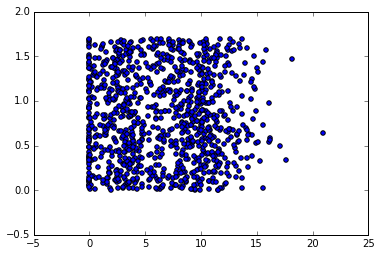

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:, 2])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(datingDataMat[:,1], datingDataMat[:, 2])
plt.show()

/home/mrthink/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


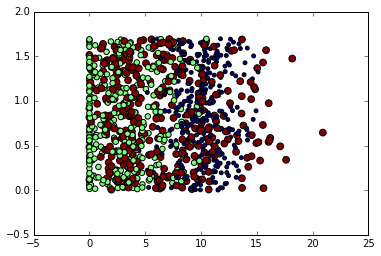

In [84]:
from numpy import array
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0*array(datingLabels_i), 15.0*array(datingLabels_i))
plt.show()

/home/mrthink/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


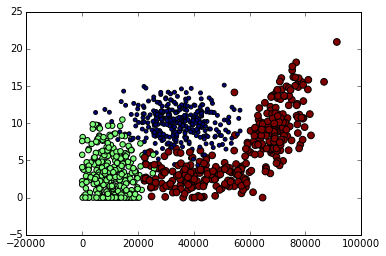

In [85]:
from numpy import array
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 15.0*array(datingLabels_i), 15.0*array(datingLabels_i))
plt.show()

datingTestSet2.txt라는 파일이 datingTestSet.txt에 있는 분류 항목 표시 값들을 정수형으로 변경해 놓은 파일이다.

** 준비: 수치형 값 정규화 하기

sqrt( (0-67)^2 + (20000 - 32000)^2 + (1.1-0.1)^2 )
: 큰 범위를 가지는 항목에 의해 결과가 결정되어 버림.

In [15]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1)) # for문 없이 연산하게 함.
    normDataSet = normDataSet / tile(ranges, (m,1))
    
    return normDataSet, ranges, minVals

In [87]:
(datingDataMat.min(0), datingDataMat.max(0))

(array([ 0.      ,  0.      ,  0.001156]),
 array([  9.12730000e+04,   2.09193490e+01,   1.69551700e+00]))

In [88]:
type(datingDataMat)

numpy.ndarray

** numpy.linalg.solve(a, b)

Solve a linear matrix equation, or system of linear scalar equations.
Computes the “exact” solution, x, of the well-determined, i.e., full rank, linear matrix equation ax = b.

In [91]:
normMat, ranges, minVals = autoNorm(datingDataMat)
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [92]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [93]:
minVals

array([ 0.      ,  0.      ,  0.001156])

** 검사: 전체 프로그램으로 분류기 검사

90% data로 분류기의 학습을 하고,
나머지 10% data로 검사를 수행함.

In [96]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('machinelearninginaction/Ch02/datingTestSet.txt') ## label이 int인 것으로 바꿔서 해볼 수도 있음.
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    ## kNN은 학습 과정이 필요 없으므로 바로 인식으로 들어감.
    # 앞쪽 10%의 data만을 사용하여 test를 수행함. 나머지는 모델로 활용.
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :],\
                                    datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %s, the real answer is: %s"\
              %(classifierResult, datingLabels[i])) ## ???
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
            
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))

In [97]:
datingClassTest()

the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real a

** 사용: 모두에게 유용한 시스템 만들기

In [46]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video mages?"))
    ffMiles = float(input("frequent flier limes earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('machinelearninginaction/Ch02/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels, 3)
    print("You will probably like this person: ", classifierResult)
#     print("You will probably like this person: ", resultList[int(float(classifierResult)) -1]) ## ???

In [47]:
classifyPerson()

percentage of time spent playing video mages?10
frequent flier limes earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person:  smallDoses


# 필기체 인식 시스템

** 필기체 인식 시스템에서 kNN 사용하기

1. 수집: 제공된 텍스트 파일
2. 준비: 분류기 classify0()을 사용해서 이미지 형태를 리스트 형태로 전환하는 함수 작성
3. 분석: 올바른 데이터인지 확인하기 위해 파이썬 쉘에서 준비된 데이터 관찰
4. 훈련: kNN 알고리즘에는 적용되지 않음
5. 검사: 검사용 예제에 있는 데이터의 일부분을 사용하여 함수 만들기. 
       검사에 사용되지 않을 예제로부터 검사에 사용될 예제를 분류해 낸다.
       예측된 분류 항목이 실제 분류 항목과 일치하지 않는다면, 오류로 간주하고 오류 횟수를 누적한다.
6. 사용: 이 예제에서는 다루지 않는다. 미국에서 메일을 정렬하기 위해 사용되는 시스템처럼 
       이미지로부터 번호를 추출하기 위한 프로그램을 만들 수 있다.

** 준비: 이미지를 vector로 변환하기

훈련용: 2000개의 예제가 있으며 번호별로 대략 200개의 표본이 있음
검사용: 900개의 예제가 있음.

두 그룹간의 중복이 없어야 함.

기존의 분류기로 처리하기 위해서 이미지를 하나의 vector로 재구성해야 함.
즉, 32x32 행렬로 이루어진 각각의 바이너리 이미지를 1x1024 vector로 처리함.

In [21]:
def img2vector(filename):
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
            
    return returnVect

In [23]:
testVector = img2vector('machinelearninginaction/Ch02/testDigits/0_13.txt')

In [24]:
testVector[0, 0:31]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [25]:
testVector[0, 32:63]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

** 검사: 필기체 번호에 kNN 적용하기

모든 값이 0과 1 이기때문에 autoNorm()을 사용하지 않는다.


In [31]:
from os import listdir

def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('machinelearninginaction/Ch02/trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024)) # 1x1024 vector...
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0]) # 분류번호 추출
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('machinelearninginaction/Ch02/trainingDigits/%s' % fileNameStr)
        
    testFileList = listdir('machinelearninginaction/Ch02/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    # 한번에 하나의 file을 처리함.
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('machinelearninginaction/Ch02/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: %d, the real answer is: %d"\
              % (classifierResult, classNumStr))
        if(classifierResult != classNumStr):
            errorCount += 1.0
    
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [32]:
handwritingClassTest()

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answe

kNN이 생각보다 연산량이 많이 든다.
kNN을 변경한 알고리즘 중 'kD-Tree'라는 것이 계산 횟수를 줄일 수 있다.
https://en.wikipedia.org/wiki/K-d_tree
>> 좀더 찾아보는 걸로....

kNN을 사례기반 학습(instance-based learning)의 한 예이다.
이 알고리즘은 data 집합 전체를 다루기 때문에 큰 data 집합을 처리하기 위해서 큰 저장소가 필요하다.
또한 모든 data에 대해서 거리 측정을 해야 하기 때문에 연산량 또한 문제가 될 수 있다.

마지막으로 데이터에 대해서 어떠한 정보도 주지 않기 때문에 평균이나 모범적인 사례가 어떤 것인지 알 수 없다.